<a href="https://colab.research.google.com/github/Supu12-ui/AI_ENABLED_fINOTECH_b2b/blob/main/Sentimental_Analysis_for_Votify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Analysis for Votify

###Importing the Libraries

In [485]:
#IMPORTING THE REQUIRED LIBRARIES
import datetime as dt
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

###Store the Dataset into Dataframe


In [486]:
#importing given dataset
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['Documents.csv']))

Saving Documents.csv to Documents.csv


###Number of column and rows


In [487]:
df.shape

(1041, 17)

###checking the detail Information of the dataset

In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1041 non-null   int64  
 1   user_id                1041 non-null   int64  
 2   document_name          1041 non-null   object 
 3   description            1041 non-null   object 
 4   pdf_name               965 non-null    object 
 5   pdf_path               965 non-null    object 
 6   status                 1041 non-null   int64  
 7   latitude               728 non-null    float64
 8   longitude              728 non-null    float64
 9   created_at             1041 non-null   object 
 10  updated_at             1041 non-null   object 
 11  color_id               1007 non-null   float64
 12  color_status           1041 non-null   int64  
 13  is_fake                1041 non-null   int64  
 14  state                  764 non-null    object 
 15  coun

###Display all the columns name


In [489]:
df.columns

Index(['id', 'user_id', 'document_name', 'description', 'pdf_name', 'pdf_path',
       'status', 'latitude', 'longitude', 'created_at', 'updated_at',
       'color_id', 'color_status', 'is_fake', 'state', 'county',
       'attachment_permission'],
      dtype='object')

###Describe the entire Dataset


In [490]:
df.describe()

,id,user_id,status,latitude,longitude,color_id,color_status,is_fake,attachment_permission
count,1041.000000,1041.000000,1041.0,728.000000,728.000000,1007.000000,1041.000000,1041.000000,1041.000000
mean,715.563881,6079.833814,1.0,36.675686,-93.439102,3.175770,0.967339,0.008646,0.999039
std,387.626180,3648.661206,0.0,5.389094,23.228561,0.928823,0.177833,0.092623,0.030994
min,7.000000,44.000000,1.0,0.000000,-157.858140,2.000000,0.000000,0.000000,0.000000
25%,377.000000,3186.000000,1.0,33.430250,-111.856035,3.000000,1.000000,0.000000,1.000000
50%,727.000000,5942.000000,1.0,35.539130,-88.786110,3.000000,1.000000,0.000000,1.000000
75%,989.000000,9312.000000,1.0,40.848674,-80.102758,4.000000,1.000000,0.000000,1.000000
max,1544.000000,14725.000000,1.0,58.400519,83.570233,6.000000,1.000000,1.000000,1.000000


#Data Cleaning


####show the five record of the dataset



In [491]:
df.head()

,id,user_id,document_name,description,pdf_name,pdf_path,status,latitude,longitude,created_at,updated_at,color_id,color_status,is_fake,state,county,attachment_permission
0,7,290,Misc.Red Flags,ES&S machines in poll manager training room,.png,/pdf/.png,1,NaN,NaN,5/18/2022 13:57,11/6/2023 12:49,3.0,1,0,NaN,NaN,1
1,10,342,Mail in Ballot Issues,Why is a person registered to vote at the Noko...,.png,/pdf/.png,1,NaN,NaN,5/28/2022 2:29,8/30/2023 13:53,2.0,1,0,NaN,NaN,1
2,11,448,Misc. Red Flags,Found a bus broke down with ballot printers. T...,Fri Jun 03 16_16_43 MST 2022.jpg,/pdf/Fri Jun 03 16_16_43 MST 2022.jpg,1,NaN,NaN,6/3/2022 23:17,8/30/2023 13:52,3.0,1,0,NaN,NaN,1
3,12,486,Help/Support,How do I see other candidates beside Finchem?,.png,/pdf/.png,1,NaN,NaN,6/4/2022 20:50,6/4/2022 20:50,NaN,0,0,NaN,NaN,1
4,13,497,Misc. Red Flags,early voting again without requesting it. no i...,1654390984885.jpg,/pdf/1654390984885.jpg,1,NaN,NaN,6/5/2022 1:03,8/30/2023 13:52,2.0,1,0,NaN,NaN,1


###count the number of null values in the columns

In [492]:
df.isnull().sum() / df.shape[0] * 100

id                        0.000000
user_id                   0.000000
document_name             0.000000
description               0.000000
pdf_name                  7.300672
pdf_path                  7.300672
status                    0.000000
latitude                 30.067243
longitude                30.067243
created_at                0.000000
updated_at                0.000000
color_id                  3.266090
color_status              0.000000
is_fake                   0.000000
state                    26.609030
county                   26.705091
attachment_permission     0.000000
dtype: float64

####Display id and user_Id


In [493]:
df[["id", "user_id"]]

,id,user_id
0,7,290
1,10,342
2,11,448
3,12,486
4,13,497
...,...,...
1036,1539,10232
1037,1541,4703
1038,1542,14257
1039,1543,14725


####Check the status of Color_id so we can change the name

In [494]:
df['color_id'].value_counts()

color_id
3.0    441
2.0    248
4.0    217
5.0     95
6.0      6
Name: count, dtype: int64

####change the color format from 1 to 5

In [495]:
df['color_id']=df['color_id']-1

####check whether the color name is changed or not

In [496]:
df['color_id'].value_counts()

color_id
2.0    441
1.0    248
3.0    217
4.0     95
5.0      6
Name: count, dtype: int64

##### 1 -> white, 2 -> Yellow 3 -> Orange 4 -> Red 5 -> Tricolor

####drop all the following columns from the dataframe


In [497]:
cols = ["id", "user_id", "document_name", "pdf_name", "pdf_path", "status","latitude", "longitude", "created_at", "updated_at","color_status", "is_fake", "state", "county",
       "attachment_permission"]
df.drop(cols, axis=1, inplace=True)

####check the dataframe whether the columns is drop off or not

In [498]:
df.columns

Index(['description', 'color_id'], dtype='object')

####Show all the Duplicate rows from the dataframe

In [499]:
df[df.duplicated(keep='first')]

,description,color_id
99,"They had me use a no name felt tip marker, not...",2.0
504,Test,NaN
538,"Madison, CT using felt tip pens.",2.0


####Display the Number of Duplicate Rows

In [500]:
df.duplicated().sum()

3

####Drop all the Duplicate Rows

In [501]:
df.drop_duplicates(keep='first', inplace=True)

####Now check for all duplicate rows now


In [502]:
df.duplicated().sum()

0

####the number of Rows and Columns in your dataset

In [503]:
df.shape

(1038, 2)

####Find out the total count of null values in each columns

In [504]:
df.isnull().sum()

description     0
color_id       33
dtype: int64

#Data Type Conversion

####For checking the data types of columns

In [505]:
df.dtypes

description     object
color_id       float64
dtype: object

####need to convert the description in string and color_id into int

In [506]:
df['description'] = df['description'].astype(str)
df['color_id'] = df['color_id'].fillna(0).astype(int)

#####0-> will represent null values

In [507]:
df.dtypes

description    object
color_id        int64
dtype: object

In [508]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [509]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

##Data Stemming

#### convert the description data from upper case to lower case and break the string sentence into list

In [510]:
port_stem= PorterStemmer()

In [511]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ', content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmend_content=''.join(stemmed_content)
  return stemmed_content

In [512]:
df['stemmed_content']= df['description'].apply(stemming)

In [513]:
print(df['stemmed_content'])

0                  [es, machin, poll, manag, train, room]
1       [person, regist, vote, nokomi, beach, park, ba...
2       [found, bu, broke, ballot, printer, elect, sys...
3                           [see, candid, besid, finchem]
4       [earli, vote, without, request, inform, poll, ...
                              ...                        
1036    [earli, vote, primari, tucker, reid, librari, ...
1037    [worker, could, find, electron, poll, book, ne...
1038    [pc, sit, tabl, review, sampl, ballot, ask, su...
1039    [sent, absente, ballot, track, know, count, ch...
1040        [dem, owo, ccp, cartel, fund, invas, countri]
Name: stemmed_content, Length: 1038, dtype: object


### Splitting of train data and stemming data

###### X will be for stemmed_content and Y will be for color_id

In [514]:
df.columns

Index(['description', 'color_id', 'stemmed_content'], dtype='object')

In [515]:
x = df['stemmed_content'].values
y = df['color_id'].values

In [516]:
print(x)

[list(['es', 'machin', 'poll', 'manag', 'train', 'room'])
 list(['person', 'regist', 'vote', 'nokomi', 'beach', 'park', 'bath', 'hous', 'mail', 'ballot', 'go', 'franc', 'casey', 'key', 'road', 'nokomi', 'fl', 'voter', 'id', 'barbara', 'clair', 'weber', 'baur', 'ter', 'avenu', 'jean', 'casal', 'buc', 'franc', 'race', 'femal', 'born', 'regist', 'democrat', 'vote', 'absente', 'march', 'nov', 'march', 'vote', 'histori'])
 list(['found', 'bu', 'broke', 'ballot', 'printer', 'elect', 'system', 'softwar', 'time', 'report', 'said', 'arizona', 'use', 'ess', 'machin', 'az', 'audit', 'mention', 'ess', 'print', 'ballot', 'poll', 'hear', 'voter', 'fraud', 'yuma', 'counti', 'person', 'drive', 'bu', 'said', 'obtain', 'printer', 'paper', 'yuma', 'thank', 'shannon', 'benbow'])
 ...
 list(['pc', 'sit', 'tabl', 'review', 'sampl', 'ballot', 'ask', 'supervisor', 'poll', 'mgr', 'explain', 'answer', 'question', 'redistrict', 'start', 'tab', 'district', 'map', 'tab', 'georgia', 'so', 'myvot', 'page', 'tab', 'c

In [517]:
print(y)

[2 1 2 ... 1 1 5]


In [630]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,stratify=y,random_state=2)

In [631]:
print(x.shape,x_train.shape,y.shape,y_train.shape)

(1038,) (519,) (1038,) (519,)


In [632]:
print(x_train)
print(x_test)

[list(['took', 'pictur', 'monitor', 'screen', 'research', 'app', 'found', 'cisa', 'repirt', 'vulner', 'exact', 'suit'])
 list(['aloha', 'poll', 'close', 'pm', 'hawaii', 'pm', 'scanner', 'oahu', 'count', 'center', 'went', 'offlin', 'hart', 'central', 'ballot', 'scanner', 'oahu', 'count', 'center', 'scanner', 'lead', 'scanner', 'scanner', 'network', 'hart', 'supervisor', 'turn', 'order', 'reboot', 'get', 'back', 'onlin', 'appar', 'st', 'time', 'happen', 'oahu', 'count', 'center', 'process', 'ballot', 'entir', 'counti', 'honolulu', 'corinn', 'solomon', 'audit', 'vote', 'hawaii'])
 list(['verizon', 'mifi', 'internet', 'hotspot', 'poll', 'place', 'attach', 'photo', 'show', 'avail', 'wifi', 'network', 'insid', 'build'])
 list(['poll', 'pad', 'display', 'appar', 'request', 'provision', 'ballot', 'multipl', 'voter', 'paper', 'receipt', 'request', 'ordinari', 'ballot'])
 list(['sharpi'])
 list(['tp', 'link', 'wifi', 'avail', 'insid', 'build', 'might', 'noth'])
 list(['son', 'vote', 'signatur', 

#### convert the x_train from string data to numerical data

In [633]:
vectorizer = TfidfVectorizer()
# Convert the list of lists in x_train to a list of strings
x_train_str = [' '.join(doc) for doc in x_train]
x_train = vectorizer.fit_transform(x_train_str)


x_test_str = [' '.join(doc) for doc in x_test]
x_test = vectorizer.transform(x_test_str)

# Check the type of x_train
print(type(x_train))

# Look at a small part of the data (first 5 rows and columns)
print(x_train[:5, :5].toarray()) # Convert a small slice to a dense array for display


<class 'scipy.sparse._csr.csr_matrix'>
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [634]:
print(x_train)

  (0, 2137)	0.32125109874291985
  (0, 745)	0.32125109874291985
  (0, 2397)	0.30623648771829876
  (0, 1819)	0.3424130044203077
  (0, 399)	0.3424130044203077
  (0, 867)	0.25841373391475125
  (0, 113)	0.24889806533890202
  (0, 1830)	0.32125109874291985
  (0, 1926)	0.2372518282373635
  (0, 1409)	0.2945902506167602
  (0, 1629)	0.22773615966151423
  (0, 2247)	0.19610091301182994
  (1, 2390)	0.03936371021300114
  (1, 156)	0.11812895474482134
  (1, 2035)	0.1418887998137976
  (1, 487)	0.1418887998137976
  (1, 1016)	0.1418887998137976
  (1, 502)	0.055025909879774126
  (1, 712)	0.11479511594859475
  (1, 1708)	0.09209046273712175
  (1, 960)	0.07878575494875038
  (1, 2234)	0.0727106388891267
  (1, 2072)	0.0956052828656353
  (1, 114)	0.11812895474482134
  (1, 1528)	0.11479511594859475
  :	:
  (518, 125)	0.11110716012415005
  (518, 1251)	0.0965050203175608
  (518, 931)	0.10528464152572033
  (518, 695)	0.12443621076179916
  (518, 1621)	0.11861369216336944
  (518, 2341)	0.09967170760413945
  (518, 2242

In [635]:
print(x_test)

  (0, 2480)	0.04038640531031433
  (0, 2476)	0.04201301539576002
  (0, 2440)	0.0778443585447065
  (0, 2429)	0.043317975286571955
  (0, 2427)	0.05590704635022366
  (0, 2419)	0.052646309452816384
  (0, 2415)	0.1252356890572635
  (0, 2406)	0.047518436024566686
  (0, 2400)	0.053851687002417804
  (0, 2390)	0.023018694212619265
  (0, 2282)	0.0713840020548457
  (0, 2273)	0.048723813574168114
  (0, 2209)	0.057489971100382065
  (0, 2200)	0.053851687002417804
  (0, 2196)	0.0713840020548457
  (0, 2190)	0.05323464306595748
  (0, 2171)	0.05053359448747267
  (0, 2158)	0.1252356890572635
  (0, 2095)	0.24891669591886864
  (0, 2093)	0.0778443585447065
  (0, 2068)	0.06543991692052832
  (0, 1945)	0.06712867402042112
  (0, 1941)	0.05005629663577924
  (0, 1940)	0.05053359448747267
  (0, 1897)	0.0361622656813156
  :	:
  (517, 986)	0.2160453164093763
  (517, 718)	0.2383349651904224
  (517, 689)	0.1142832553200617
  (517, 350)	0.3967060536894958
  (517, 274)	0.1449541304530002
  (517, 256)	0.1836712105263567
 

## Train the model

#### Plot of Color_id data we can check average of color_id where y_train is color_id

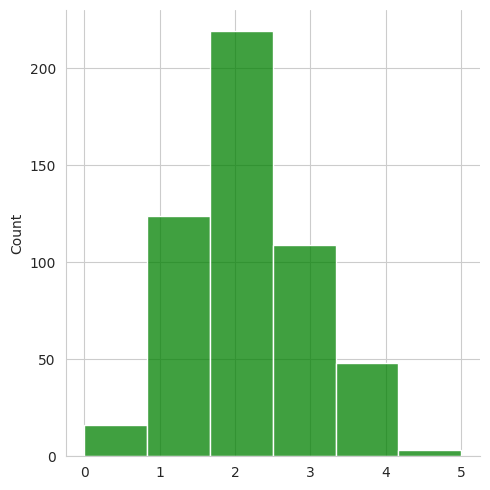

In [636]:
#bar plot
sns.set_style('whitegrid')
sns.displot(data=y_train, kde=False, bins=6,color='green')

####Data Visualization on the basis of Color_id and description

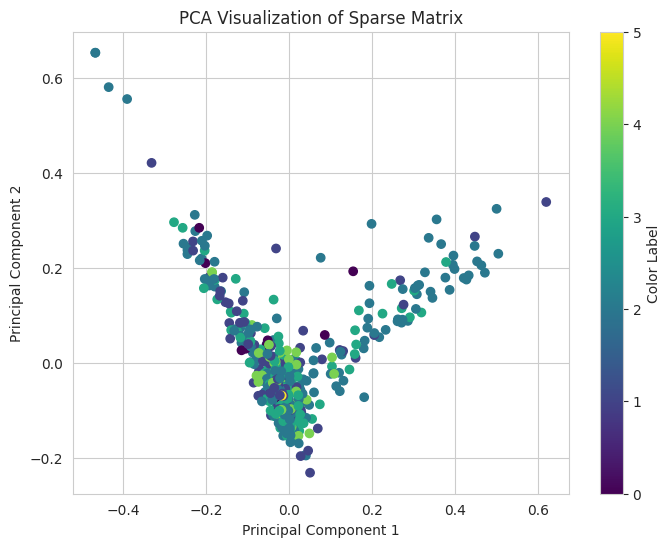

In [637]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_train.toarray())

# Plot the data as a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.title('PCA Visualization of Sparse Matrix')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Color Label')
plt.show()


#### By using the Logistic Regression

In [638]:
model1 = LogisticRegression(max_iter=1000)

In [639]:
model1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [640]:
x_train_prediction = model1.predict(x_train)
training_data_accuracy = accuracy_score(y_train,x_train_prediction)

In [641]:
print('accuracy on training data using logistic regression', training_data_accuracy*100)

accuracy on training data using logistic regression 78.03468208092485


In [642]:
x_test_prediction = model1.predict(x_test)
training_data_accuracy = accuracy_score(y_test,x_test_prediction)

In [643]:
model1.fit(x_test,y_test)

LogisticRegression(max_iter=1000)

In [644]:
print('Accuracy score on the test data', training_data_accuracy*100)

Accuracy score on the test data 45.08670520231214


#### By using the Support vector model

In [645]:
model2 = SVC(kernel='linear')  # Choose an appropriate kernel (linear, rbf, poly, etc.)
model2.fit(x_train, y_train)

SVC(kernel='linear')

In [646]:
y_pred = model2.predict(x_test)

In [647]:
x_train_prediction = model2.predict(x_train)
training_data_accuracy = accuracy_score(y_train,x_train_prediction)
print("Accuracy score on training data",training_data_accuracy*100)

Accuracy score on training data 84.97109826589595


In [648]:
x_test_prediction = model2.predict(x_test)
training_data_accuracy = accuracy_score(y_test,x_test_prediction)

In [649]:
model2.fit(x_test,y_test)

SVC(kernel='linear')

In [650]:
print('Accuracy score on the test data', training_data_accuracy*100)

Accuracy score on the test data 44.89402697495183


#### By using the random forest Classifier


In [651]:
model3 = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators as needed
model3.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [652]:
x_train_prediction= model3.predict(x_train)

In [653]:
accuracy = accuracy_score(y_train, x_train_prediction)
print("Accuracy score of testing data using random forest classifier:", accuracy*100)

Accuracy score of testing data using random forest classifier: 100.0


In [654]:
x_test_prediction = model3.predict(x_test)
training_data_accuracy = accuracy_score(y_test,x_test_prediction)
model3.fit(x_test,y_test)
print('Accuracy score on the test data', training_data_accuracy*100)

Accuracy score on the test data 46.24277456647399


####After checking the accuracy now save the file use for future model

In [655]:
# # Make predictions and store them in a variable
# predictions = model3.predict(x_test)

# # Optionally, get probabilities for each class (if needed)
# probabilities = model3.predict_proba(x_test)

# # Print the predictions and probabilities
# print("Predictions:", predictions)
# print("Probabilities:", probabilities)

In [656]:
# !pip install openpyxl
# import pandas as pd
# import openpyxl

# # ... (your previous code for preprocessing and model loading)

# # Make predictions and store them
# predictions = model3.predict(X_new)
# probabilities = model3.predict_proba(X_new)

# # Create a DataFrame to hold the predictions
# df = pd.DataFrame({
#     'Predicted_Class': predictions
# })

# # Optionally, add probabilities for each class as columns
# for i in range(probabilities.shape[1]):
#     df[f'Probability_Class_{i}'] = probabilities[:, i]

# # Save the DataFrame to an Excel file
# df.to_excel('predictions.xlsx', index=False)

# print("Predictions saved to 'predictions.xlsx'")

In [657]:
import pickle

In [658]:
filename = 'final_model.xlsx'
pickle.dump(model3, open(filename, 'wb'))

In [659]:
loaded_model = pickle.load(open('final_model.xlsx', 'rb'))

In [660]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
nltk.download('punkt')
nltk.download('wordnet')
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # Lowercasing
    tokens = [token.lower() for token in tokens]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [678]:
X_new = x_test[494]


print(y_test[451])


prediction = model3.predict(X_new)
print(prediction)

if prediction[0] == 0:
    print('null values')
elif prediction[0] == 1:
    print('white -> Probably Begin')
elif prediction[0] == 2:
    print('yellow -> Worth a look')
elif prediction[0] == 3:
    print('orange -> Need a serious look into it')
elif prediction[0] == 4:
    print('red -> Requires immediate action')
else:
    print('tricolor -> Saffron')

1
[3]
orange -> Need a serious look into it
